In [1]:
# Recurrent Neural Networks with IMDB Dataset for binary classification - a movie is/is not good

In [2]:
#LSTM - Long Short-Term Memory - makes the neural netrwork recurrent and helps learning from sequences

In [3]:
#Libs
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
#from tensorflow.keras.layers.embeddings import Embedding 
from keras.layers import Embedding

### Eenable the GPU
import tensorflow as tf
import time as time
import numpy as np

import matplotlib.pyplot as plt 

In [4]:
#Data import
(X_train, y_train), (X_valtest, y_valtest) = imdb.load_data(num_words=8000) #max is 88 000 (!)

In [5]:
%pprint # to view in row

Pretty printing has been turned OFF


In [6]:
X_train[321] # 1D list of integers representing one review content

[1, 1415, 2204, 9, 24, 43, 6, 20, 12, 9, 6, 1379, 2650, 3818, 65, 5, 2618, 83, 4, 2667, 978, 7, 6, 678, 1494, 11, 479, 24, 64, 127, 3387, 2079, 81, 6, 1307, 292, 7, 2, 6, 2, 2930, 632, 1230, 5497, 21, 29, 1545, 6, 749, 8, 4, 1071, 44, 4, 3645, 7, 1226, 2, 2, 4, 65, 7, 5497, 35, 2, 2121, 5, 27, 293, 2, 2597, 1411, 9, 6, 5448, 31, 21, 4, 2095, 1023, 7, 27, 113, 70, 140, 724, 4, 2, 2534, 11, 1226, 2415, 1415, 2204, 1030, 8, 5702, 8, 94, 311, 4, 6842, 1251, 7, 4, 1573, 1193, 114, 12, 9, 88, 7, 87, 108, 40, 14, 31, 15, 4, 1071, 70, 413, 6100, 23, 394, 687, 11, 479, 87, 6125, 37, 6442, 8, 130, 98, 5, 89, 75, 70, 115, 1741, 98, 8, 593, 11, 4, 705, 88, 7, 14, 3395, 1415, 2204, 9, 35, 480, 22, 15, 144, 30, 110, 34, 32]

In [7]:
 y_train[321] # Target variable 1 - good review, 0 - bad review

1

In [8]:
# Decoding hint: Each word has a value for frequency occurence in the data set. 
# 1 - most frequent, n - less frequent
# However, there is a offset by 3, such that: 4 - most frequent, n + 3 - less frequent
# 0 - Padding or need to expand the review for equal dimensions between all training samples
# 1 - Token to start a text sequence for learning
# 2 - Unknown word, which may not have been loaded if num_words < frequency of word(i)

In [9]:
# Decoding

In [10]:
#wti - word to index
wti = imdb.get_word_index()

In [11]:
wti['amazing']

477

In [12]:
#itw - index to word
itw = {i: w for (w,i) in wti.items()} # i - index, w - word

In [13]:
[itw[ii] for ii in range(1,11)] # getting the top 10 words

['the', 'and', 'a', 'of', 'to', 'is', 'br', 'in', 'it', 'i']

In [14]:
# We need stops words in this case !

In [15]:
# So in reality the review with index 321 is the following:
' '.join([itw.get(i-3,'?') for i in X_train[321]]) # ? will appear if we have indices from 0 to 3

'? cry freedom is not just a movie it is a historical account heroic story and insight into the cultural background of a major event in history not only does denzel washington do a terrific job of ? a ? determined hero steve biko but he delivers a message to the public about the horrors of south ? ? the story of biko an ? leader and his main ? donald woods is a heartbreaking one but the ultimate success of his life can go beyond the ? committed in south africa cry freedom manages to communicate to its audience the optimistic aspect of the seemingly disturbing plot it is because of great films like this one that the public can become educated on terrible events in history great leaders who sought to end them and how we can never allow them to happen in the future because of this importance cry freedom is an amazing film that should be seen by all'

In [16]:
# Positive review as snippet 8 reveals

In [17]:
# Now we need to idicate the number of words per review - Ex. 80

In [18]:
wpr = 80
X_train = pad_sequences(X_train, maxlen=wpr)
X_valtest = pad_sequences(X_valtest, maxlen=wpr)

In [19]:
X_test, X_validate, y_test, y_validate = train_test_split(X_valtest, y_valtest, random_state = 69, test_size = 0.5)

In [20]:
print('Train data size is:\n', X_train.shape)
print('\nTrain label size is:\n', y_train.shape)
print('\nValidation data size is:\n', X_validate.shape)
print('\nValidation label size is:\n', y_validate.shape)
print('\nTest data size is:\n', X_test.shape)
print('\nTest label size is:\n', y_test.shape)

Train data size is:
 (25000, 80)

Train label size is:
 (25000,)

Validation data size is:
 (12500, 80)

Validation label size is:
 (12500,)

Test data size is:
 (12500, 80)

Test label size is:
 (12500,)


In [21]:
# Check CPU and GPU 
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [22]:
# Print GPU
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [23]:
# Building the model

In [24]:
rnn = Sequential()

Metal device set to: Apple M1


2023-06-15 16:32:13.672677: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-15 16:32:13.672761: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [25]:
# We need embedding to reduce dimensionality by encoding each word in vector representation.
# This would allow to include the context of a given word. 

In [26]:
rnn.add(Embedding(input_dim=8000, output_dim=128, input_length=wpr))

In [27]:
#rnn.add(tf.keras.layers.BatchNormalization())

In [28]:
rnn.add(LSTM(units=80, dropout=0.2, recurrent_dropout=0.2, activation='relu')) # max 80 neuors as we have 80 words per review

In [29]:
#rnn.add(tf.keras.layers.BatchNormalization())

In [30]:
#rnn.add(Dense(128, activation='relu'))

In [31]:
#rnn.add(tf.keras.layers.Dropout(0.2))

In [32]:
#rnn.add(tf.keras.layers.BatchNormalization())

In [33]:
rnn.add(Dense(units=1, activation='sigmoid'))

In [34]:
rnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 80, 128)           1024000   
                                                                 
 lstm (LSTM)                 (None, 80)                66880     
                                                                 
 dense (Dense)               (None, 1)                 81        
                                                                 
Total params: 1,090,961
Trainable params: 1,090,961
Non-trainable params: 0
_________________________________________________________________


In [36]:
with tf.device('/CPU:0'):
     model = rnn.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_validate, y_validate))

Epoch 1/10


2023-06-15 16:32:13.900382: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-06-15 16:32:14.798362: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 1181.6733 - accuracy: 0.6544

2023-06-15 16:34:20.547988: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 156s 99ms/step - loss: 1181.6733 - accuracy: 0.6544 - val_loss: 0.6149 - val_accuracy: 0.6645
Epoch 2/10
1563/1563 [==============================] - 170s 109ms/step - loss: 0.7255 - accuracy: 0.7547 - val_loss: 0.7608 - val_accuracy: 0.7383
Epoch 3/10
1563/1563 [==============================] - 174s 111ms/step - loss: 0.5560 - accuracy: 0.7904 - val_loss: 0.5512 - val_accuracy: 0.7447
Epoch 4/10
1563/1563 [==============================] - 174s 111ms/step - loss: 0.4216 - accuracy: 0.8141 - val_loss: 0.5152 - val_accuracy: 0.7642
Epoch 5/10
1563/1563 [==============================] - 180s 115ms/step - loss: 0.3630 - accuracy: 0.8420 - val_loss: 0.5083 - val_accuracy: 0.7748
Epoch 6/10
1563/1563 [==============================] - 164s 105ms/step - loss: 0.3170 - accuracy: 0.8640 - val_loss: 0.5007 - val_accuracy: 0.7890
Epoch 7/10
1563/1563 [==============================] - 168s 108ms/step - loss: 0.3362 - accuracy: 0.8648 - val_loss: 0.5

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


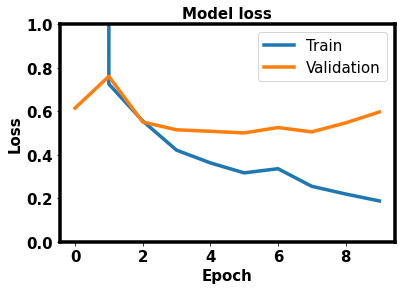

In [40]:
print(model.history.keys())

# "Loss"
fig, ax = plt.subplots()
plt.plot(model.history['loss'], linewidth=3.5)
plt.plot(model.history['val_loss'], linewidth=3.5)
plt.title('Model loss', size=15, fontweight='bold')
ax.spines[:].set_linewidth(3.5)
plt.ylabel('Loss', size=15, fontweight='bold')
plt.yticks(fontsize=15,fontweight='bold')
plt.ylim(0, 1)
plt.xlabel('Epoch', size=15, fontweight='bold')
plt.xticks(fontsize=15,fontweight='bold')
plt.legend(['Train', 'Validation'], loc='upper right', fontsize=15)
plt.show()

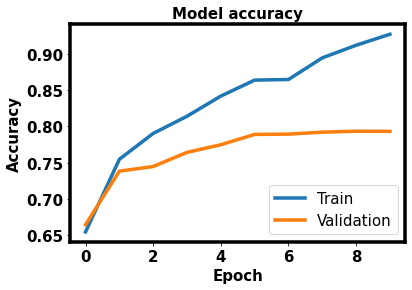

In [38]:
fig, ax = plt.subplots()
plt.plot(model.history['accuracy'], linewidth=3.5)
plt.plot(model.history['val_accuracy'], linewidth=3.5)
plt.title('Model accuracy', size=15, fontweight='bold')
ax.spines[:].set_linewidth(3.5)
plt.ylabel('Accuracy', size=15, fontweight='bold')
plt.yticks(fontsize=15,fontweight='bold')
plt.xlabel('Epoch', size=15, fontweight='bold')
plt.xticks(fontsize=15,fontweight='bold')
leg = plt.legend(['Train', 'Validation'], loc='lower right', fontsize=15) #prop={'weight':'bold'})
plt.show()

In [41]:
loss, accuracy = rnn.evaluate(X_test, y_test)

2023-06-15 17:01:11.215068: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - 127s 324ms/step - loss: 0.5837 - accuracy: 0.7962


In [42]:
loss

0.5837215781211853

In [43]:
accuracy

0.7961599826812744

In [44]:
predictions = rnn.predict(X_test)

2023-06-15 17:03:18.008615: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - 126s 321ms/step


In [74]:
predictions_rounded = np.round(predictions)